## Testing transforms.py

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.plots import *
from fastai.dataset import *

In [2]:
PATH = "data/fish/"
PATH = "/data2/yinterian/fisheries-kaggle/"

### Fish with bounding box

In [3]:
fnames,corner_labels,_,_ = parse_csv_labels(f'{PATH}trn_bb_corners_labels', skip_header=False)

In [4]:
def get_x(f):
    return open_image(f'{PATH}/images/{f}')

In [5]:
f = 'img_02642.jpg'
x = get_x(f)
y = np.array(corner_labels[f], dtype=np.float32)
y

array([  699.39899,   954.69702,   895.32599,  1275.30005], dtype=float32)

In [6]:
x.shape

(974, 1280, 3)

In [7]:
rows = np.rint([y[0], y[0], y[2], y[2]]).astype(int)
rows

array([699, 699, 895, 895])

In [8]:
cols = np.rint([y[1], y[3], y[1], y[3]]).astype(int)
cols

array([ 955, 1275,  955, 1275])

In [9]:
corner_labels["img_02642.jpg"]

['699.399', '954.697', '895.326', '1275.3']

In [10]:
def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def show_corner_bb(f='img_04908.jpg'):
    file_path = f'{PATH}images/{f}'
    bb = corner_labels[f]
    plots_from_files([file_path])
    plt.gca().add_patch(create_corner_rect(bb))

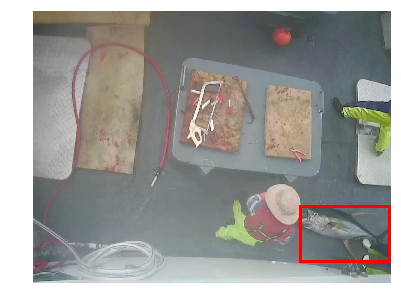

In [11]:
show_corner_bb(f = 'img_02642.jpg')

In [12]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def plotXY(x,y):
    plots([x])
    plt.gca().add_patch(create_rect(y))

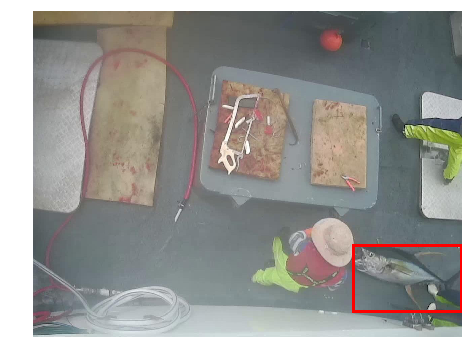

In [13]:
plotXY(x,y)

## Scale

In [14]:
xx, yy = Scale(sz=350, tfm_y=TfmType.COORD)(x, y)

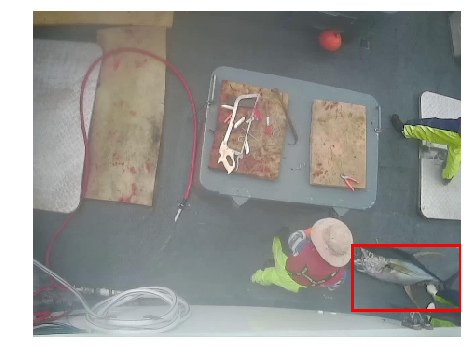

In [15]:
plotXY(xx,yy)

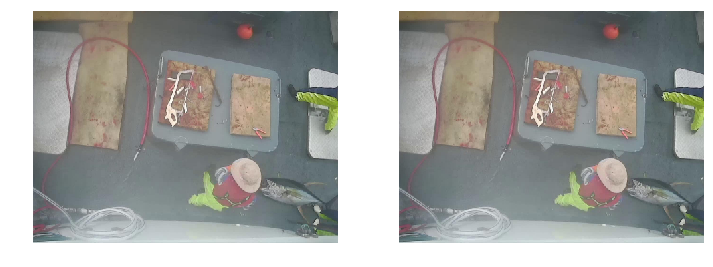

In [16]:
xx, yy = Scale(sz=350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## RandomScale

[271 370 347 494]
[  699.39899   954.69702   895.32599  1275.30005]


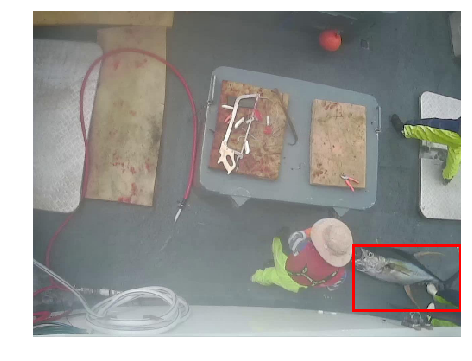

In [17]:
xx, yy = RandomScale(sz=350, max_zoom=1.1, tfm_y=TfmType.COORD)(x, y)
plotXY(xx,yy)
print(yy)
print(y)

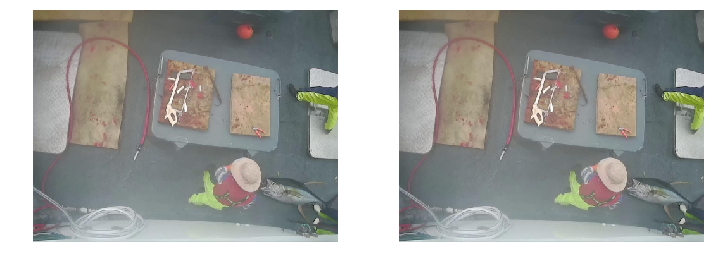

In [18]:
xx, yy = RandomScale(sz=350, max_zoom=1.1, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## RandomCrop

In [19]:
xx, yy = RandomCrop(targ=350, tfm_y=TfmType.COORD)(x, y)

loss my fish


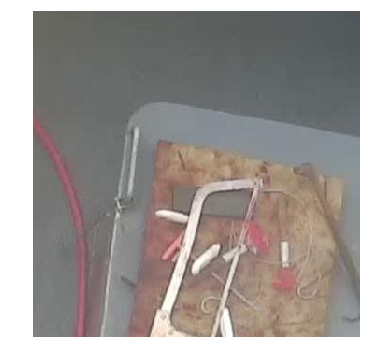

In [20]:
plotXY(xx,yy)

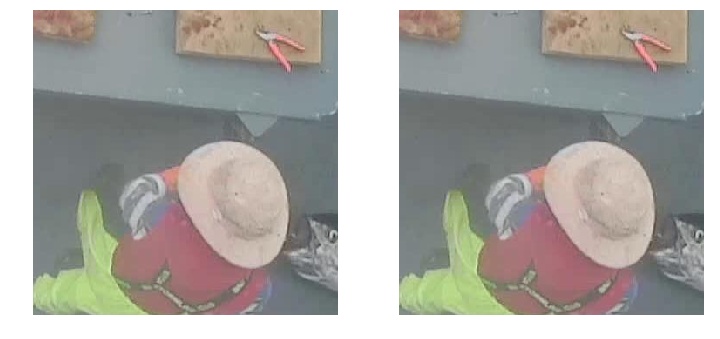

In [21]:
xx, yy = RandomCrop(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## No Cropping

In [22]:
xx, yy = NoCrop(350, tfm_y=TfmType.COORD)(x, y)

[251 261 321 348]


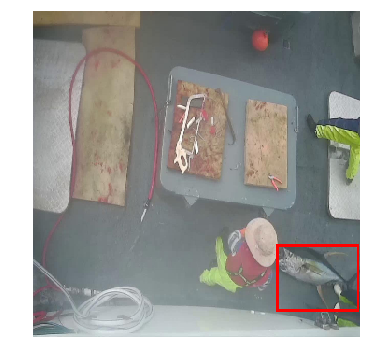

In [23]:
print(yy)
plotXY(xx,yy)

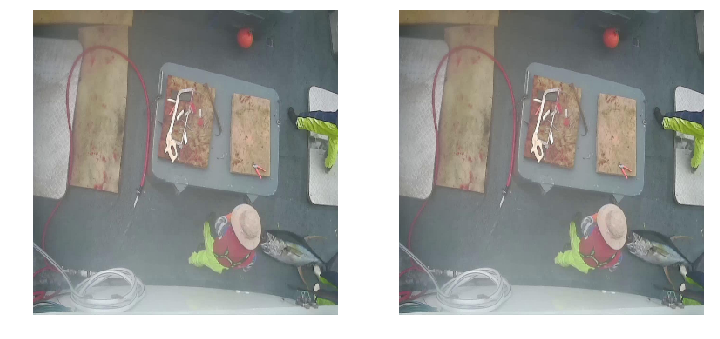

In [24]:
xx, yy = NoCrop(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## CenterCrop

In [25]:
xx, yy = CenterCrop(350, tfm_y=TfmType.COORD)(x, y)

loss my fish


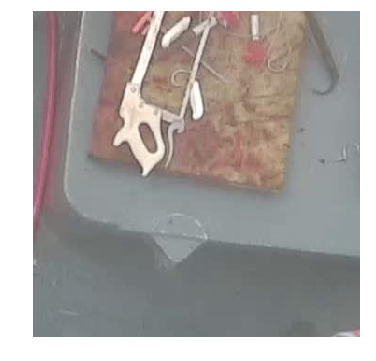

In [26]:
plotXY(xx,yy)

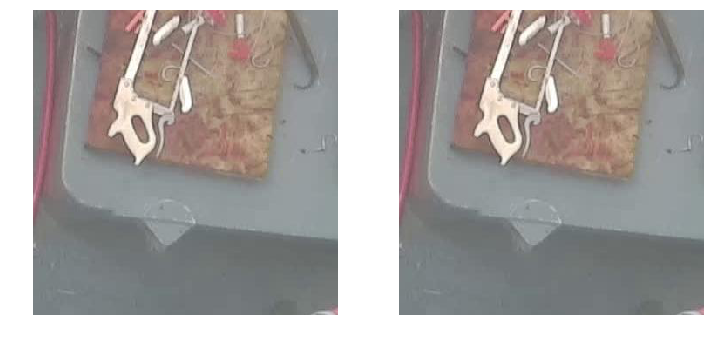

In [27]:
xx, yy = CenterCrop(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## Random Dihedral

In [28]:
xx, yy = RandomDihedral(TfmType.COORD)(x, y)

In [29]:
print(yy)

[  4  78 324 274]


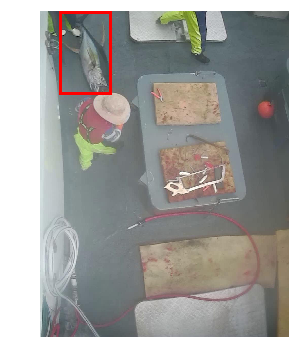

In [30]:
plotXY(xx,yy)

In [31]:
xx, yy = RandomDihedral(tfm_y=TfmType.PIXEL)(x, x)

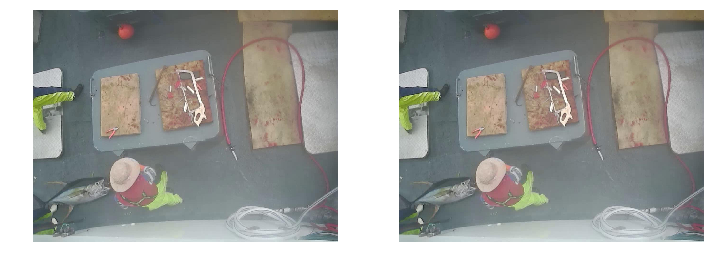

In [32]:
plots([xx,yy])

## RandomFlipXY

[ 699  955  895 1275]


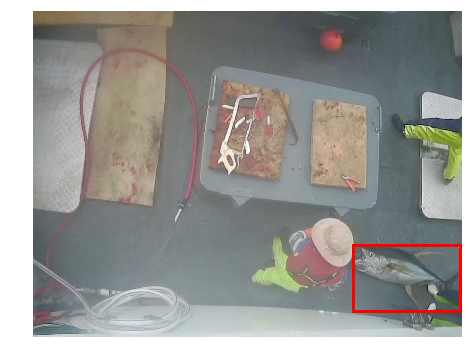

In [33]:
xx, yy = RandomFlip(TfmType.COORD)(x, y)
print(yy)
plotXY(xx,yy)

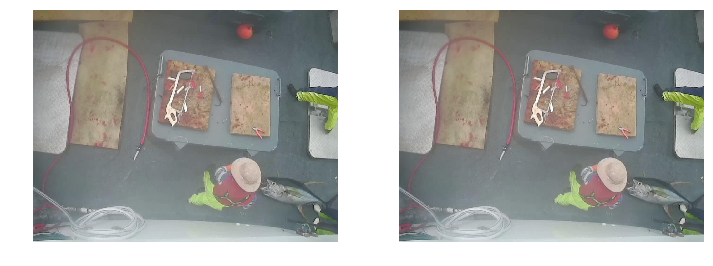

In [34]:
xx, yy = RandomFlip(TfmType.PIXEL)(x, x)
plots([xx,yy])

## RandomLightingXY (talk to Jeremy about this)

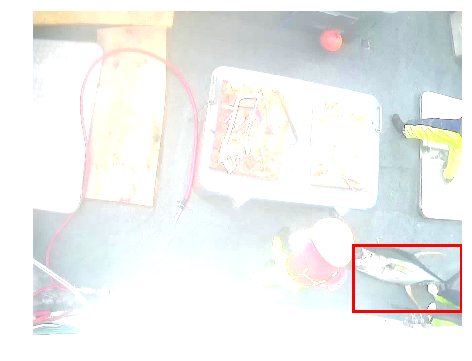

In [35]:
xx, yy = RandomLighting(0.5, 0.5)(x, y)
plotXY(xx,yy)

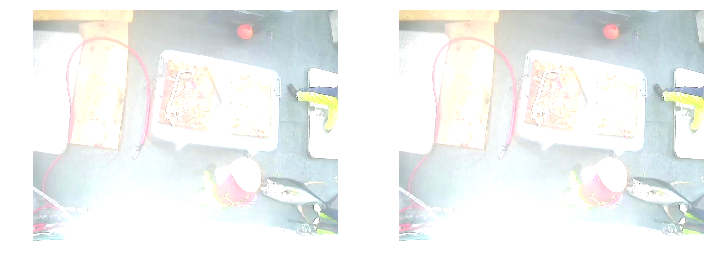

In [36]:
# talk to Jeremy about this
xx, yy = RandomLighting(0.5, 0.5, TfmType.PIXEL)(x, x)
plots([xx,yy])

## RandomRotate

[ 547  995  808 1277]


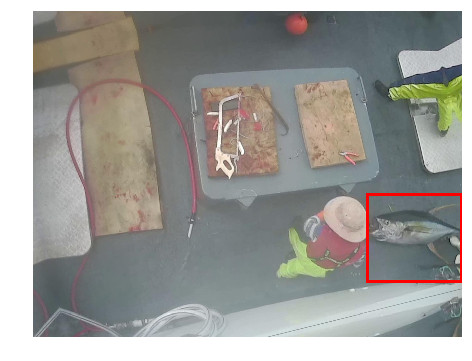

In [37]:
xx, yy = RandomRotate(deg=30, p=1, tfm_y=TfmType.COORD)(x, y)
plotXY(xx,yy)
print(yy)

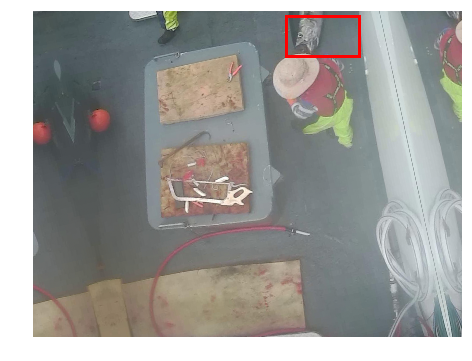

In [38]:
xx, yy = RandomRotate(130,p=1.0, tfm_y=TfmType.COORD)(x, y)
plotXY(xx,yy)

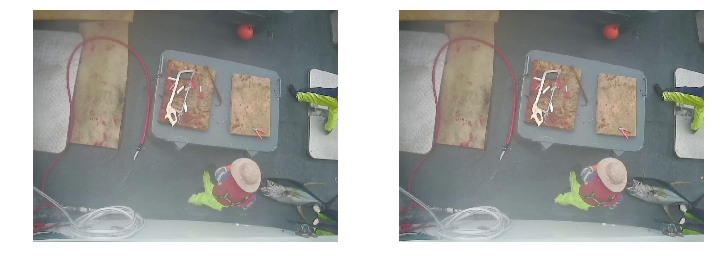

In [39]:
xx, yy = RandomRotate(0.5, 0.5, TfmType.PIXEL)(x, x)
plots([xx,yy])